In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
import tensorflow
import keras
from datetime import datetime

# Download CSV file

In [2]:
df = pd.read_csv('coursework_other.csv', encoding = 'unicode_escape', parse_dates=['Date'], dayfirst=True, index_col=['Date'])
df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
Date,,,,,,,,,,,,,
2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [3]:
df['Day'] = df.index.day
df['Month'] = df.index.month
df['Year'] = df.index.year
df['DayOfWeek']=df.index.dayofweek
df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,DayOfWeek
Date,,,,,,,,,,,,,,,,,
2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,4
2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,4
2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,4
2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,4
2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018,4
2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018,4
2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018,4


In [4]:
df = df.reset_index()
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,DayOfWeek
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,4
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,4
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,4
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,4
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018,4
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018,4
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018,4
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018,4


Print the shape of Dataframe  and Check for Null Values

In [5]:
print("Dataframe Shape:", df.shape)
print("Any NaN Values Present?", df.isnull().values.any())

Dataframe Shape: (8760, 18)
Any NaN Values Present? False


# Data Processing

## Set target variable, Y, as the Daily Rented Bike Count


In [6]:
#Set Target Variable
Y = pd.DataFrame(df["Rented Bike Count"])

## Set features, X

In [7]:
#Selecting the Features
X = pd.DataFrame(df.iloc[:,1:])

# print(X.shape)
print('The shape of Y is: ', Y.shape)
print('The shape of X is: ', X.shape)
print('The 17 features are: ', X.columns)

The shape of Y is:  (8760, 1)
The shape of X is:  (8760, 17)
The 17 features are:  Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Day', 'Month', 'Year', 'DayOfWeek'],
      dtype='object')


In [8]:
from sklearn.preprocessing import OneHotEncoder

categorical = X[["Seasons","Holiday","Functioning Day","DayOfWeek"]]

ohe = OneHotEncoder(drop='if_binary', sparse=False)
ohe.fit(categorical)
ohe.get_feature_names()

array(['x0_Autumn', 'x0_Spring', 'x0_Summer', 'x0_Winter',
       'x1_No Holiday', 'x2_Yes', 'x3_0', 'x3_1', 'x3_2', 'x3_3', 'x3_4',
       'x3_5', 'x3_6'], dtype=object)

In [9]:
ohe.get_params()

{'categories': 'auto',
 'drop': 'if_binary',
 'dtype': numpy.float64,
 'handle_unknown': 'error',
 'sparse': False}

In [10]:
ohe.categories_

[array(['Autumn', 'Spring', 'Summer', 'Winter'], dtype=object),
 array(['Holiday', 'No Holiday'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array([0, 1, 2, 3, 4, 5, 6])]

In [11]:
categorical_encoded = ohe.transform(categorical)
categorical_encoded

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [12]:
cat_columns = ['Season_Autumn','Season_Spring','Season_Summer','Season_Winter','Holiday_Yes','Functioning_Day_Yes','DayOfWeek_Sun','DayOfWeek_Mon','DayOfWeek_Tue','DayOfWeek_Wed','DayOfWeek_Thu','DayOfWeek_Fri','DayOfWeek_Sat']
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=cat_columns)
categorical_encoded_df

,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Holiday_Yes,Functioning_Day_Yes,DayOfWeek_Sun,DayOfWeek_Mon,DayOfWeek_Tue,DayOfWeek_Wed,DayOfWeek_Thu,DayOfWeek_Fri,DayOfWeek_Sat
0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8756,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8757,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8758,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [13]:
X = pd.concat([X,categorical_encoded_df], axis=1)
X


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,Season_Winter,Holiday_Yes,Functioning_Day_Yes,DayOfWeek_Sun,DayOfWeek_Mon,DayOfWeek_Tue,DayOfWeek_Wed,DayOfWeek_Thu,DayOfWeek_Fri,DayOfWeek_Sat
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [14]:
X = X.drop(columns=['Seasons','Functioning Day','DayOfWeek','Holiday'])
X

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,Season_Winter,Holiday_Yes,Functioning_Day_Yes,DayOfWeek_Sun,DayOfWeek_Mon,DayOfWeek_Tue,DayOfWeek_Wed,DayOfWeek_Thu,DayOfWeek_Fri,DayOfWeek_Sat
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [15]:
X.dtypes

Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Day                            int64
Month                          int64
Year                           int64
Season_Autumn                float64
Season_Spring                float64
Season_Summer                float64
Season_Winter                float64
Holiday_Yes                  float64
Functioning_Day_Yes          float64
DayOfWeek_Sun                float64
DayOfWeek_Mon                float64
DayOfWeek_Tue                float64
DayOfWeek_Wed                float64
DayOfWeek_Thu                float64
DayOfWeek_Fri                float64
DayOfWeek_Sat                float64
dtype: object

# Neural Network using Tensorflow

## Normalise Input features

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

X = sc.fit_transform(X)
X = sc.transform(X)

# Split into a train and test set

In [17]:
from sklearn.model_selection import train_test_split

Y = np.ravel(Y)
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, shuffle=False ,random_state=42)

print("The size of the train set is:", X_train.size, " and the size of the test set is:", X_test.size)
print("The ratio is", round(X_train.size/(X_test.size+X_train.size), 4))

The size of the train set is: 182208  and the size of the test set is: 45552
The ratio is 0.8


## Build Neural Network with Keras

In [43]:
from keras.layers import Dense, Activation
from keras.models import Sequential

start_time = datetime.now()

# Building model
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(units = 8, activation = 'relu', input_dim = 26))

# Adding the second hidden layer
model.add(Dense(units = 24, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 60, activation = 'relu'))

# Adding the fourth hidden layer
model.add(Dense(units = 24, activation = 'relu'))

# Adding the fifth hidden layer
model.add(Dense(units = 52, activation = 'relu'))

#avoids overfitting
#https://keras.io/api/layers/regularization_layers/dropout/
model.add(keras.layers.Dropout(0.0001))

# Adding the output layer

model.add(Dense(units = 1))


# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mae', metrics=['mae'])#metrics tracks values but doesn't decide with it

# Fitting the ANN to the Training set
history = model.fit(X_train, y_train, batch_size = 20, epochs = 150, validation_split=0.3)


end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Epoch 1/150
246/246 [==============================] - 1s 3ms/step - loss: 505.1079 - mae: 505.1079 - val_loss: 405.1132 - val_mae: 405.1132
Epoch 2/150
246/246 [==============================] - 0s 919us/step - loss: 168.2556 - mae: 168.2556 - val_loss: 299.4705 - val_mae: 299.4705
Epoch 3/150
246/246 [==============================] - 0s 1ms/step - loss: 99.3308 - mae: 99.3308 - val_loss: 234.3882 - val_mae: 234.3882
Epoch 4/150
246/246 [==============================] - 0s 1ms/step - loss: 64.1941 - mae: 64.1941 - val_loss: 200.9417 - val_mae: 200.9417
Epoch 5/150
246/246 [==============================] - 0s 896us/step - loss: 45.1897 - mae: 45.1897 - val_loss: 191.2388 - val_mae: 191.2388
Epoch 6/150
246/246 [==============================] - 0s 930us/step - loss: 35.6121 - mae: 35.6121 - val_loss: 179.7959 - val_mae: 179.7959
Epoch 7/150
246/246 [==============================] - 0s 919us/step - loss: 28.2891 - mae: 28.2891 - val_loss: 174.7863 - val_mae: 174.7863
Epoch 8/150
246

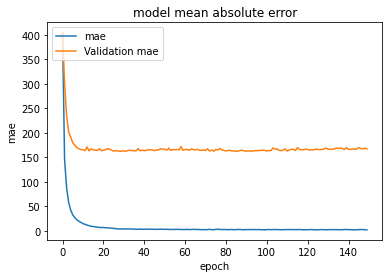

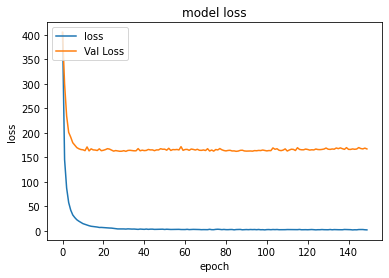

In [45]:
#plot learning curves

#accuracy no idea what this is for
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mean absolute error')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['mae', 'Validation mae'], loc='upper left')
plt.show()

#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','Val Loss'], loc='upper left')#, 'Validation Loss'
plt.show()

In [46]:
#model evaluation
score = model.evaluate(X_test, y_test)[1] # Accuracy
score2= model.evaluate(X_test, y_test)[0] # Loss

55/55 [==============================] - 0s 557us/step - loss: 628.6614 - mae: 628.6614


In [41]:
print('Accuracy without tuning: {}'.format(score))
print('Loss without tuning: {}'.format(score2))

Accuracy without tuning: 574.0307006835938
Loss without tuning: 574.0307006835938


In [42]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 26)                702       
_________________________________________________________________
dense_7 (Dense)              (None, 16)                432       
_________________________________________________________________
dense_8 (Dense)              (None, 40)                680       
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 328       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 9         
Total params: 2,151
Trainable params: 2,151
Non-trainable params: 0
____________________________________________________

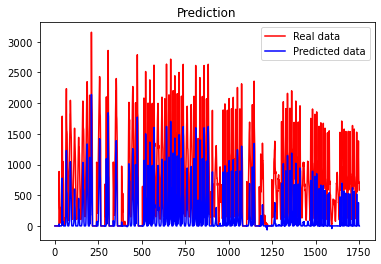

In [35]:
y_pred = model.predict(X_test)

plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [36]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 596.9301194735722
Mean Squared Error: 504547.84973591316
Root Mean Squared Error: 710.3153171204414


## HP Tuning

In [51]:
import keras_tuner as kt
from keras_tuner import HyperModel

def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 2, 10)): #2 to 20 hidden layers
        model.add(Dense(units=hp.Int('units_' + str(i),
                                            min_value=8,
                                            max_value=64, #no. of neurons tested is between 32 and 512
                                            step=4),
                               activation= hp.Choice('dense_activation', 
                                                     values=['relu', 'tanh','sigmoid'])))
    
    model.add(
        keras.layers.Dropout(
            hp.Float(
                    'dropout',
                    min_value=0.0001,
                    max_value=0.1,
                    step=0.01)
        )
    )

    # Adding the output layer
    model.add(Dense(units = 1, activation = 'linear'))


    model.compile(
        #optimizer='adam',
        optimizer = hp.Choice('dense_optimizer',
                values=['adam','SGD','rmsprop','adadelta'] ),
        loss = 'mae',
        metrics = ['mae']
    )
    return model

In [53]:
tuner_rs = kt.tuners.RandomSearch(
            build_model,
            objective='val_mae',
            max_trials=200,
            executions_per_trial=2, overwrite=True)

In [54]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [55]:
start_time = datetime.now()

tuner_rs.search(X_train1, y_train1, epochs=100, validation_data=(X_val, y_val)) #, verbose=0)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Trial 34 Complete [00h 00m 26s]
val_mae: 496.5674591064453

Best val_mae So Far: 7.944812536239624
Total elapsed time: 00h 16m 47s

Search: Running Trial #35

Hyperparameter    |Value             |Best Value So Far 
num_layers        |6                 |8                 
units_0           |32                |32                
dense_activation  |tanh              |relu              
units_1           |44                |52                
dropout           |0.0701            |0.0701            
dense_optimizer   |adadelta          |adam              
units_2           |8                 |44                
units_3           |16                |12                
units_4           |64                |40                
units_5           |40                |12                
units_6           |44                |12                
units_7           |32                |52                
units_8           |16                |8                 
units_9           |28                |None 

In [ ]:
#collect best hyperparameters to rebuild model
best_model = tuner_rs.get_best_hyperparameters()[0]
model = tuner_rs.hypermodel.build(best_model)

In [ ]:
# Training the Model
history = model.fit(X_train1, y_train1, batch_size = 10, epochs = 100, validation_data=(X_val, y_val), verbose = 0)

In [ ]:
model.summary()

In [ ]:
#loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [ ]:
# get new predicted values with Hyperparameters
y_best_model_pred = model.predict(X_test)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

In [ ]:
# plot predicted values against test values
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_best_model_pred, color = 'blue', label = 'HP Predicted data')
plt.title('HP Prediction')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# checking the output metrics
from sklearn import metrics

y_hp_pred=y_best_model_pred

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_hp_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_hp_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hp_pred)))

y_mean = np.mean(y_hp_pred)
y_std = np.std(y_hp_pred)
print('Output Standard Deviation:', y_std)
print('Output Mean:', y_mean)

In [ ]:
tuner_rs.results_summary()

# Baseline model performance
### Using the Close value as the Adjusted Close value for that day. 

In [40]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt


Close_test = pd.DataFrame(X_test['Close'])
BL_r2 = r2_score(y_test, Close_test)
BL_RMSE = sqrt(mean_squared_error(y_test, Close_test))
BL_MAE = sqrt(mean_absolute_error(y_test, Close_test))

print('BASELINE MODEL:')
print('Using the Close value of that day as the Adjusted Close value prediction')
print('    - The R^2 score on test dataset = ',BL_r2)
print('    - RMSE on test dataset = ', BL_RMSE)
print('    - MAE on test dataset = ', BL_MAE)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

# Ridge regression

## Grid search for best parameters for Ridge model

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


Pipeline

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Ridge(max_iter=100000, tol=0.001))
])

In [ ]:
search = GridSearchCV(pipeline,
                     {'model__alpha':np.linspace(0.002,0.005,20)},
                     cv=4,
                     scoring = 'neg_root_mean_squared_error',
                     verbose=0
                     
                     )

In [ ]:
# import warnings
# warnings.filterwarnings('ignore')

search.fit(X_train, y_train)


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Ridge(max_iter=100000))]),
             param_grid={'model__alpha': array([0.002     , 0.00215789, 0.00231579, 0.00247368, 0.00263158,
       0.00278947, 0.00294737, 0.00310526, 0.00326316, 0.00342105,
       0.00357895, 0.00373684, 0.00389474, 0.00405263, 0.00421053,
       0.00436842, 0.00452632, 0.00468421, 0.00484211, 0.005     ])},
             scoring='neg_root_mean_squared_error')

In [ ]:
print(search.best_params_)
coef = search.best_estimator_[1].coef_
print(coef)
print("Features included in the Lasso model:", np.array(features)[coef != 0])
print("Features discarded from the Lasso model:", np.array(features)[coef == 0])

{'model__alpha': 0.005}
[-2.41085064e-03 -3.42805697e-02 -6.24916655e-01 -3.06145130e+00
  2.77992432e+00  1.82008146e+00  1.21381841e+01]
Features included in the Lasso model: ['Day' 'Month' 'Year' 'Open' 'High' 'Low' 'Close']
Features discarded from the Lasso model: []


In [ ]:
pred_train = search.best_estimator_.predict(X_train)
pred_test = search.best_estimator_.predict(X_test)

print('Ridge Regression model:')
print("Train:")
print('    - R^2 score = ',r2_score(y_true= y_train, y_pred= pred_train))
print('    - RMSE = ', sqrt(mean_squared_error(y_true= y_train, y_pred= pred_train)))
print('    - MAE = ', sqrt(mean_absolute_error(y_true= y_train, y_pred= pred_train)))
print("Test:")
print('    - R^2 score = ',r2_score(y_true= y_test, y_pred= pred_test))
print('    - RMSE = ', sqrt(mean_squared_error(y_true= y_test, y_pred= pred_test)))
print('    - MAE = ', sqrt(mean_absolute_error(y_true= y_test, y_pred= pred_test)))

Ridge Regression model:
Train:
    - R^2 score =  0.9985841413249849
    - RMSE =  0.49478609626767367
    - MAE =  0.6135777204118708
Test:
    - R^2 score =  0.9939710622884429
    - RMSE =  2.929886023563268
    - MAE =  1.664706878225074
